# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
# sinasc_raw = sinasc_raw.select_dtypes(exclude=['object'])
sinasc_raw

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27023,1,2604388.0,510340,1,32,2.0,12 anos ou mais,333115.0,1.0,0.0,...,5,2767632,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27024,1,2752654.0,510675,1,19,1.0,8 a 11 anos,999992.0,0.0,0.0,...,5,2772678,ATIVO,MUNIC,Chupinguaia,Rondônia,-12.55684,-60.90185,340.0,5126.723
27025,1,9659366.0,510787,1,24,2.0,8 a 11 anos,421125.0,0.0,1.0,...,5,2776905,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915
27026,1,9659366.0,510787,1,21,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2777105,ATIVO,MUNIC,Vilhena,Rondônia,-12.74137,-60.13858,595.0,11518.915


In [3]:
sinasc_raw.columns

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'ESCMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES',
       'GESTACAO', 'GRAVIDEZ', 'PARTO', 'CONSULTAS', 'DTNASC', 'HORANASC',
       'SEXO', 'APGAR1', 'APGAR5', 'RACACOR', 'PESO', 'IDANOMAL', 'DTCADASTRO',
       'CODANOMAL', 'NUMEROLOTE', 'VERSAOSIST', 'DTRECEBIM', 'DIFDATA',
       'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010',
       'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR',
       'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM',
       'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART', 'STCESPARTO',
       'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1',
       'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON', 'PARIDADE',
       'KOTELCHUCK', 'CONTADOR', 'munResStatus', 'munResTipo', 'munResNome',
       'munResUf', 'munResLat', 'munResLon', 'munResAlt', 'munResArea'],
      dtype='object')

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
faixa_lat = pd.cut(sinasc_raw['munResLat'], [-100, -10.5, 100])

qtd_tipos_partos = sinasc_raw.pivot_table(values=['QTDPARTNOR', 'QTDPARTCES'],
                                          index=['GESTACAO', faixa_lat],
                                          aggfunc={'QTDPARTNOR': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'QTDPARTCES': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
qtd_tipos_partos

QTDPARTCES                        \
                                           max      mean median  min   
GESTACAO            munResLat                                          
22 a 27 semanas     (-100.0, -10.5]        1.0  0.303030    0.0  0.0   
                    (-10.5, 100.0]         1.0  0.104167    0.0  0.0   
28 a 31 semanas     (-100.0, -10.5]        2.0  0.563380    0.0  0.0   
                    (-10.5, 100.0]         3.0  0.394737    0.0  0.0   
32 a 36 semanas     (-100.0, -10.5]        5.0  0.552381    0.0  0.0   
                    (-10.5, 100.0]         4.0  0.493988    0.0  0.0   
37 a 41 semanas     (-100.0, -10.5]       10.0  0.554250    0.0  0.0   
                    (-10.5, 100.0]        12.0  0.488585    0.0  0.0   
42 semanas e mais   (-100.0, -10.5]        4.0  0.442308    0.0  0.0   
                    (-10.5, 100.0]         2.0  0.316872    0.0  0.0   
Menos de 22 semanas (-100.0, -10.5]        2.0  0.500000    0.0  0.0   
                    (-10.5, 100.0]         0.0  0.000000    0.0  0.0   

                                                                QTDPARTNOR  \
                                          std     sum       var        max   
GESTACAO            munResLat                                                
22 a 27 semanas     (-100.0, -10.5]  0.466694    10.0  0.217803        4.0   
                    (-10.5, 100.0]   0.308709     5.0  0.095301        6.0   
28 a 31 semanas     (-100.0, -10.5]  0.787988    40.0  0.620926        4.0   
                    (-10.5, 100.0]   0.694338    30.0  0.482105        6.0   
32 a 36 semanas     (-100.0, -10.5]  0.771031   580.0  0.594489       10.0   
                    (-10.5, 100.0]   0.743723   493.0  0.553123       12.0   
37 a 41 semanas     (-100.0, -10.5]  0.740960  5992.0  0.549022       41.0   
                    (-10.5, 100.0]   0.741418  5072.0  0.549701       40.0   
42 semanas e mais   (-100.0, -10.5]  0.705598   184.0  0.497868        9.0   
                    (-10.5, 100.0]   0.562612    77.0  0.316532        5.0   
Menos de 22 semanas (-100.0, -10.5]  0.836660     3.0  0.700000        2.0   
                    (-10.5, 100.0]        NaN     0.0       NaN        0.0   

                                                                             \
                                         mean median  min       std     sum   
GESTACAO            munResLat                                                 
22 a 27 semanas     (-100.0, -10.5]  0.606061    0.0  0.0  0.966288    20.0   
                    (-10.5, 100.0]   0.836735    0.0  0.0  1.374575    41.0   
28 a 31 semanas     (-100.0, -10.5]  0.400000    0.0  0.0  0.840979    28.0   
                    (-10.5, 100.0]   0.631579    0.0  0.0  1.141252    48.0   
32 a 36 semanas     (-100.0, -10.5]  0.593123    0.0  0.0  1.200171   621.0   
                    (-10.5, 100.0]   0.809428    0.0  0.0  1.293244   807.0   
37 a 41 semanas     (-100.0, -10.5]  0.422860    0.0  0.0  1.107970  4569.0   
                    (-10.5, 100.0]   0.701647    0.0  0.0  1.274831  7241.0   
42 semanas e mais   (-100.0, -10.5]  0.614458    0.0  0.0  1.159203   255.0   
                    (-10.5, 100.0]   0.892116    0.0  0.0  1.273439   215.0   
Menos de 22 semanas (-100.0, -10.5]  0.500000    0.0  0.0  0.836660     3.0   
                    (-10.5, 100.0]   0.000000    0.0  0.0       NaN     0.0   

                                               
                                          var  
GESTACAO            munResLat                  
22 a 27 semanas     (-100.0, -10.5]  0.933712  
                    (-10.5, 100.0]   1.889456  
28 a 31 semanas     (-100.0, -10.5]  0.707246  
                    (-10.5, 100.0]   1.302456  
32 a 36 semanas     (-100.0, -10.5]  1.440412  
                    (-10.5, 100.0]   1.672481  
37 a 41 semanas     (-100.0, -10.5]  1.227597  
                    (-10.5, 100.0]   1.625194  
42 semanas e mais   (-100.0, -10.5]  1.343752  
                    (-

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [5]:
# determinando duas faixas, abaixo de 3000 e acima de 3000.
faixa_area = pd.cut(sinasc_raw['munResArea'], [-float('inf'), 3000, float('inf')])

qtd_fil_vivo_morto = sinasc_raw.pivot_table(values=['QTDFILVIVO', 'QTDFILMORT'],
                                          index=['GESTACAO', faixa_area],
                                          aggfunc={'QTDFILVIVO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'], 'QTDFILMORT': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
qtd_fil_vivo_morto

QTDFILMORT                                  \
                                          max      mean median  min       std   
GESTACAO            munResArea                                                  
22 a 27 semanas     (-inf, 3000.0]        1.0  0.307692    0.0  0.0  0.480384   
                    (3000.0, inf]         4.0  0.426471    0.0  0.0  0.886317   
28 a 31 semanas     (-inf, 3000.0]        2.0  0.250000    0.0  0.0  0.531610   
                    (3000.0, inf]         3.0  0.362903    0.0  0.0  0.666683   
32 a 36 semanas     (-inf, 3000.0]        4.0  0.314943    0.0  0.0  0.647314   
                    (3000.0, inf]         6.0  0.312934    0.0  0.0  0.642942   
37 a 41 semanas     (-inf, 3000.0]        4.0  0.237136    0.0  0.0  0.539062   
                    (3000.0, inf]        28.0  0.266970    0.0  0.0  0.625288   
42 semanas e mais   (-inf, 3000.0]        3.0  0.277778    0.0  0.0  0.560555   
                    (3000.0, inf]         9.0  0.262452    0.0  0.0  0.699663   
Menos de 22 semanas (-inf, 3000.0]        0.0  0.000000    0.0  0.0  0.000000   
                    (3000.0, inf]         0.0  0.000000    0.0  0.0  0.000000   

                                                     QTDFILVIVO            \
                                       sum       var        max      mean   
GESTACAO            munResArea                                              
22 a 27 semanas     (-inf, 3000.0]     4.0  0.230769        2.0  0.923077   
                    (3000.0, inf]     29.0  0.785558        5.0  0.808824   
28 a 31 semanas     (-inf, 3000.0]     6.0  0.282609        2.0  0.458333   
                    (3000.0, inf]     45.0  0.444466        6.0  1.081301   
32 a 36 semanas     (-inf, 3000.0]   137.0  0.419016        6.0  0.988584   
                    (3000.0, inf]    496.0  0.413374       12.0  1.218503   
37 a 41 semanas     (-inf, 3000.0]  1060.0  0.290587       30.0  0.916815   
                    (3000.0, inf]   4397.0  0.390985       14.0  1.065067   
42 semanas e mais   (-inf, 3000.0]    35.0  0.314222        5.0  0.849206   
                    (3000.0, inf]    137.0  0.489528        9.0  1.146296   
Menos de 22 semanas (-inf, 3000.0]     0.0  0.000000        3.0  1.500000   
                    (3000.0, inf]      0.0  0.000000        2.0  0.600000   

                                                                             
                                   median  min       std      sum       var  
GESTACAO            munResArea                                               
22 a 27 semanas     (-inf, 3000.0]    1.0  0.0  0.759555     12.0  0.576923  
                    (3000.0, inf]     0.0  0.0  1.260862     55.0  1.589772  
28 a 31 semanas     (-inf, 3000.0]    0.0  0.0  0.779028     11.0  0.606884  
                    (3000.0, inf]     1.0  0.0  1.225370    133.0  1.501533  
32 a 36 semanas     (-inf, 3000.0]    1.0  0.0  1.053427    433.0  1.109709  
                    (3000.0, inf]     1.0  0.0  1.354956   2002.0  1.835906  
37 a 41 semanas     (-inf, 3000.0]    1.0  0.0  1.071811   4111.0  1.148778  
                    (3000.0, inf]     1.0  0.0  1.160534  17973.0  1.346839  
42 semanas e mais   (-inf, 3000.0]    0.0  0.0  1.088614    107.0  1.185079  
                    (3000.0, inf]     1.0  0.0  1.303230    619.0  1.698409  
Menos de 22 semanas (-inf, 3000.0]    1.5  0.0  2.121320      3.0  4.500000  
                    (3000.0, inf]     0.0  0.0  0.894427      3.0  0.800000

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [6]:
# determinando 4 faixas de altitudes
faixa_alt = pd.cut(sinasc_raw['munResAlt'], 4)

sexo_peso = sinasc_raw.pivot_table(values='PESO',
                                          index=['SEXO', faixa_alt],
                                          aggfunc={'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var']})
sexo_peso

max         mean  median   min         std  \
SEXO      munResAlt                                                     
Feminino  (84.49, 212.5]  5470  3184.077578  3215.0   295  536.054393   
          (212.5, 340.0]  4915  3171.709434  3195.0   320  497.035045   
          (340.0, 467.5]  4888  3186.313187  3255.0   258  578.690812   
          (467.5, 595.0]  4704  3180.863517  3230.0   465  533.012957   
Masculino (84.49, 212.5]  5480  3308.292120  3335.0   292  546.836608   
          (212.5, 340.0]  5985  3271.432905  3310.0   285  565.679870   
          (340.0, 467.5]  4575  3300.913978  3350.0  1025  540.994862   
          (467.5, 595.0]  4920  3275.700483  3332.5   425  570.086546   

                               sum            var  
SEXO      munResAlt                                
Feminino  (84.49, 212.5]  32916994  287354.312062  
          (212.5, 340.0]   5883521  247043.836238  
          (340.0, 467.5]    579909  334883.056068  
          (467.5, 595.0]   2423818  284102.811834  
Masculino (84.49, 212.5]  36149708  299030.275449  
          (212.5, 340.0]   6362937  319993.714760  
          (340.0, 467.5]    613970  292675.441209  
          (467.5, 595.0]   2712280  324998.669552

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [7]:
# lista regiões de imediatas
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Alto Paraíso": "Ariquemes",
    "Ariquemes": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Governador Jorge Teixeira": "Jaru",
    "Jaru": "Jaru",
    "Machadinho d'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada d'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Alta Floresta d'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Cacoal": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão d'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia d'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia d'Oeste": "Cacoal",
    "São Felipe d'Oeste": "Cacoal",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena",
    "Vilhena": "Vilhena"
}

<AxesSubplot: xlabel='regiões imediatas', ylabel='média idade mãe'>

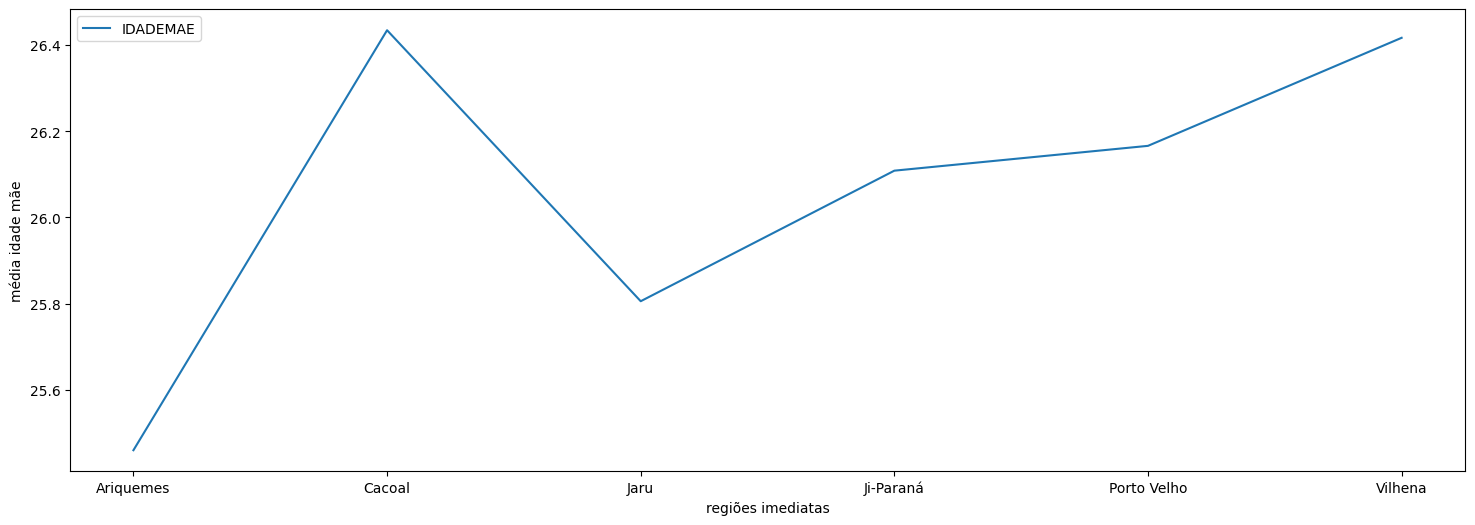

In [24]:
# Média da Idade das Mães ao longo do tempo pelas regiões imediatas
imediata_idade_mae = sinasc_raw.set_index('munResNome').groupby(imediatas)['IDADEMAE'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('média idade mãe')
plt.xlabel('regiões imediatas')
imediata_idade_mae

<AxesSubplot: xlabel='regiões imediatas', ylabel='média filho vivo'>

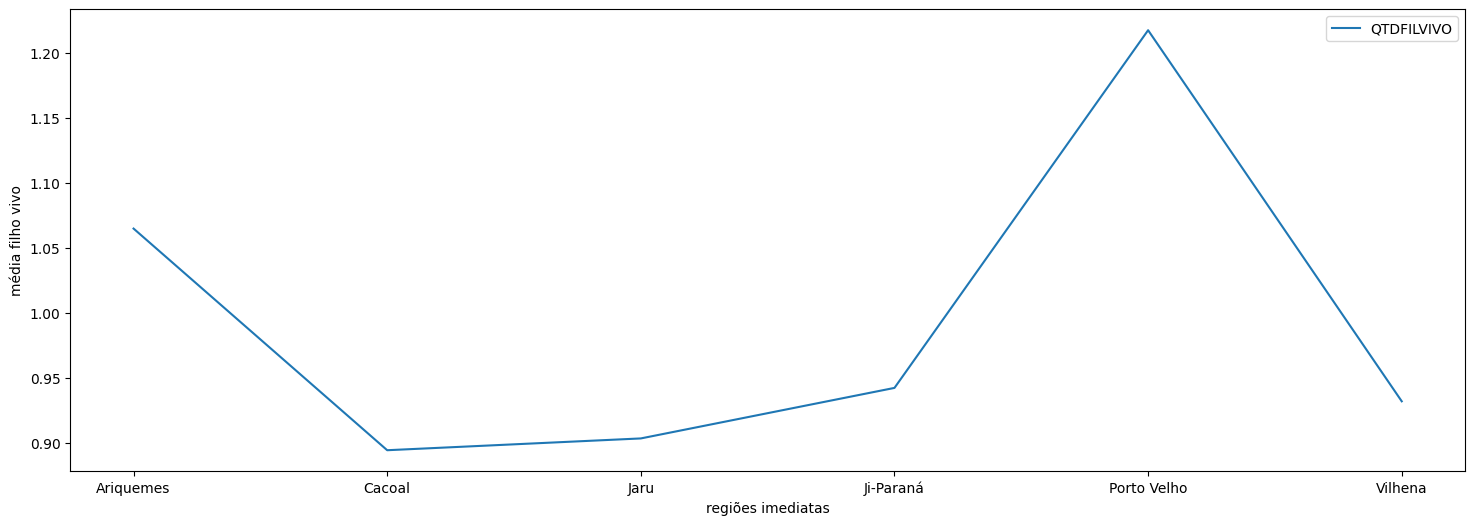

In [26]:
imediata_filho_vivo = sinasc_raw.set_index('munResNome').groupby(imediatas)['QTDFILVIVO'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('média filho vivo')
plt.xlabel('regiões imediatas')
imediata_filho_vivo

<AxesSubplot: xlabel='regiões imediatas', ylabel='media consulta pre natal'>

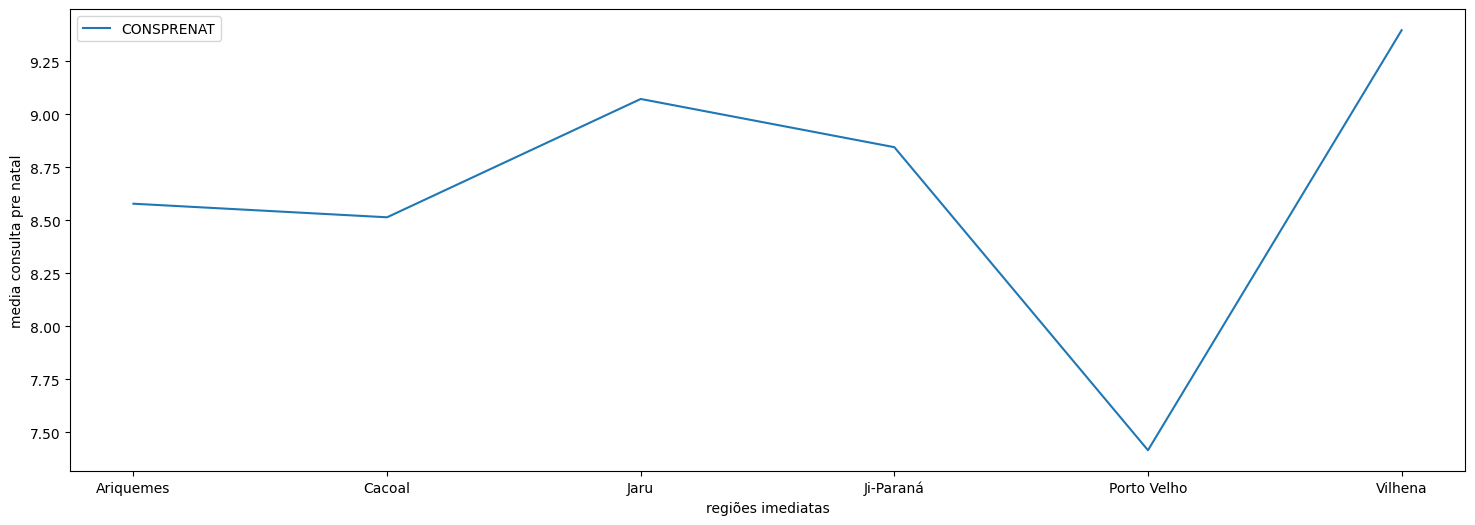

In [27]:
imediata_consultas_prenatal = sinasc_raw.set_index('munResNome').groupby(imediatas)['CONSPRENAT'].mean().to_frame().plot(figsize=[18 ,6])
plt.ylabel('media consulta pre natal')
plt.xlabel('regiões imediatas')
imediata_consultas_prenatal

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [69]:
# IDH dicionário 
lista_idh = {
        "Porto Velho": "IDH Alto",
        "Vilhena": "IDH Alto",
        "Cacoal": "IDH Alto",
        "Ji-Paraná": "IDH Alto",
        "Pimenta Bueno": "IDH Alto",
        "Ariquemes": "IDH Alto",
        "Rolim de Moura": "IDH Alto",
        "Cerejeiras": "IDH Médio",
        "Jaru": "IDH Médio",
        "Colorado do Oeste": "IDH Médio",
        "Ouro Preto do Oeste": "IDH Médio",
        "Espigão d'Oeste": "IDH Médio",
        "Santa Luzia d'Oeste": "IDH Médio",
        "Pimenteiras do Oeste": "IDH Médio",
        "Presidente Médici": "IDH Médio",
        "Castanheiras": "IDH Médio",
        "Guajará-Mirim": "IDH Médio",
        "Chupinguaia": "IDH Médio",
        "Cabixi": "IDH Médio",
        "Candeias do Jamari": "IDH Médio",
        "São Felipe d'Oeste": "IDH Médio",
        "Cacaulândia": "IDH Médio",
        "São Miguel do Guaporé": "IDH Médio",
        "Mirante da Serra": "IDH Médio",
        "Alvorada d'Oeste": "IDH Médio",
        "Teixeirópolis": "IDH Médio",
        "Nova Brasilândia d'Oeste": "IDH Médio",
        "Rio Crespo": "IDH Médio",
        "Primavera de Rondônia": "IDH Médio",
        "Alta Floresta d'Oeste": "IDH Médio",
        "Ministro Andreazza": "IDH Médio",
        "Novo Horizonte do Oeste": "IDH Médio",
        "Vale do Paraíso": "IDH Médio",
        "Alto Paraíso": "IDH Médio",
        "Parecis": "IDH Médio",
        "Buritis": "IDH Médio",
        "Itapuã do Oeste": "IDH Médio",
        "Corumbiara": "IDH Médio",
        "Cujubim": "IDH Médio",
        "Costa Marques": "IDH Médio",
        "São Francisco do Guaporé": "IDH Médio",
        "Urupá": "IDH Médio",
        "Monte Negro": "IDH Médio",
        "Seringueiras": "IDH Baixo",
        "Governador Jorge Teixeira": "IDH Baixo",
        "Machadinho d'Oeste": "IDH Baixo",
        "Campo Novo de Rondônia": "IDH Baixo",
        "Alto Alegre dos Parecis": "IDH Baixo",
        "Theobroma": "IDH Baixo",
        "Nova União": "IDH Baixo",
        "Nova Mamoré": "IDH Baixo",
        "Vale do Anari": "IDH Baixo"
}

In [70]:
# IDH por consulta pre natal 
sinasc_raw.set_index('munResNome')['CONSPRENAT'].groupby(lista_idh).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
IDH Alto,132898.0,8.239692,0.0,99.0,8.0,5.608648,31.456929
IDH Baixo,10465.0,8.106119,0.0,99.0,8.0,3.694796,13.651521
IDH Médio,56866.0,8.398464,0.0,99.0,8.0,4.630178,21.438544


Text(0.5, 0, 'nível idh')

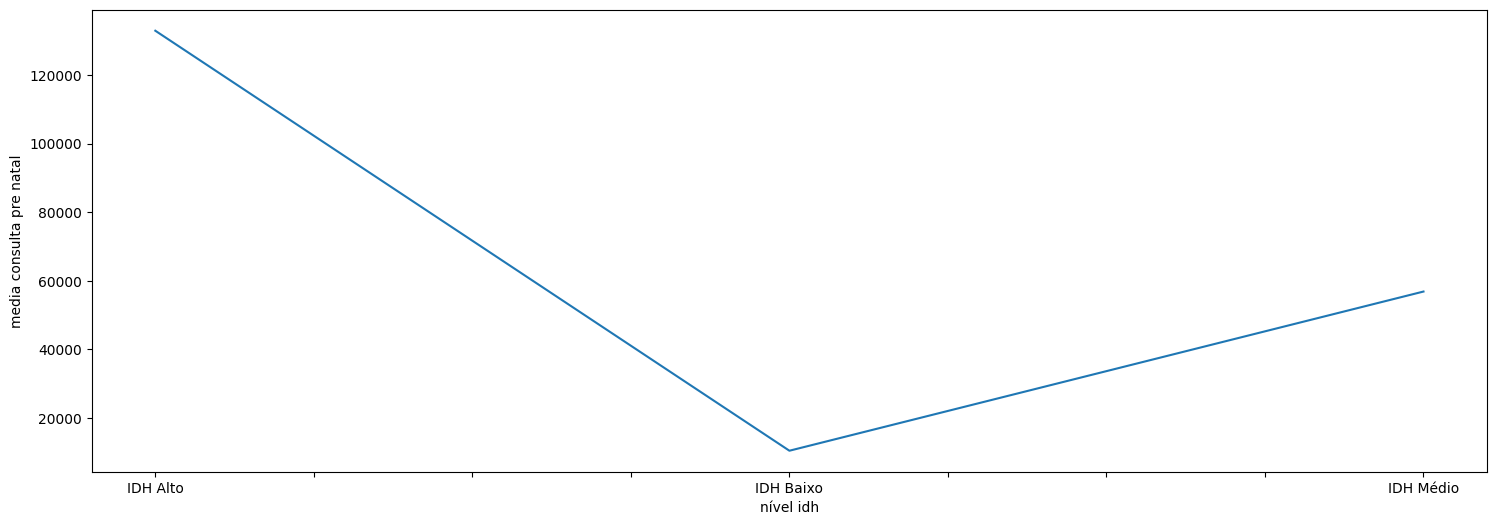

In [89]:
# IDH por consulta pre natal 
sinasc_raw.set_index('munResNome').groupby(lista_idh)['CONSPRENAT'].sum().plot(figsize=[18 ,6])
plt.ylabel('media consulta pre natal')
plt.xlabel('nível idh')

C:\Users\Joao Narciso Santos\AppData\Local\Temp\ipykernel_6764\3414901486.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sinasc_raw.set_index('munResNome').groupby(lista_idh)['QTDFILVIVO', 'QTDFILMORT'].sum().plot(figsize=[18 ,6])


Text(0.5, 0, 'nível idh')

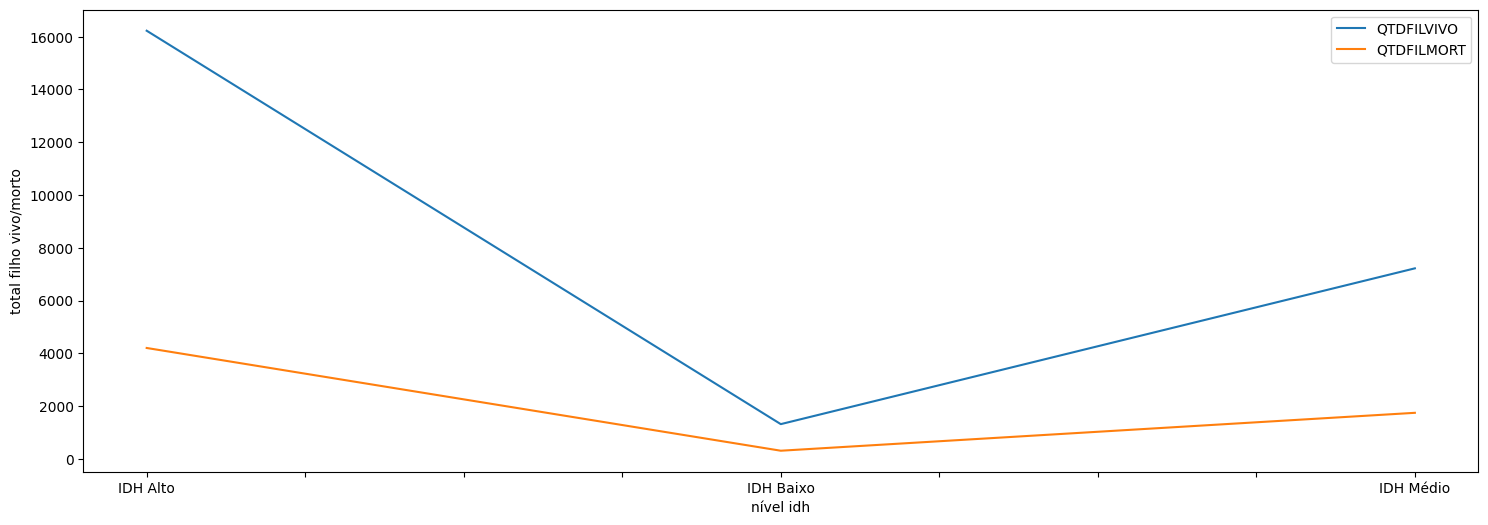

In [88]:
sinasc_raw.set_index('munResNome').groupby(lista_idh)['QTDFILVIVO', 'QTDFILMORT'].sum().plot(figsize=[18 ,6])
plt.ylabel('total filho vivo/morto')
plt.xlabel('nível idh')

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [93]:
# IFMD dicionário
lista_ifmd = {
    "Ariquemes": "IFDM Moderado",
    "Vilhena": "IFDM Moderado",
    "Pimenta Bueno": "IFDM Moderado",
    "Porto Velho": "IFDM Moderado",
    "Ji-Paraná": "IFDM Moderado",
    "Cacoal": "IFDM Moderado",
    "Santa Luzia d'Oeste": "IFDM Moderado",
    "Rolim de Moura": "IFDM Moderado",
    "Chupinguaia": "IFDM Moderado",
    "São Miguel do Guaporé": "IFDM Moderado",
    "Pimenteiras do Oeste": "IFDM Moderado",
    "Teixeirópolis": "IFDM Moderado",
    "Colorado do Oeste": "IFDM Moderado",
    "Jaru": "IFDM Moderado",
    "Rio Crespo": "IFDM Moderado",
    "Primavera de Rondônia": "IFDM Moderado",
    "Alta Floresta d'Oeste": "IFDM Moderado",
    "Ouro Preto do Oeste": "IFDM Moderado",
    "São Francisco do Guaporé": "IFDM Moderado",
    "Candeias do Jamari": "IFDM Moderado",
    "Buritis": "IFDM Moderado",
    "São Felipe d'Oeste": "IFDM Moderado",
    "Presidente Médici": "IFDM Moderado",
    "Cerejeiras": "IFDM Moderado",
    "Monte Negro": "IFDM Moderado",
    "Urupá": "IFDM Moderado",
    "Espigão d'Oeste": "IFDM Regular",
    "Seringueiras": "IFDM Regular",
    "Alvorada d'Oeste": "IFDM Regular",
    "Itapuã do Oeste": "IFDM Regular",
    "Cabixi": "IFDM Regular",
    "Novo Horizonte do Oeste": "IFDM Regular",
    "Nova Brasilândia d'Oeste": "IFDM Regular",
    "Vale do Paraíso": "IFDM Regular",
    "Corumbiara": "IFDM Regular",
    "Alto Paraíso": "IFDM Regular",
    "Cacaulândia": "IFDM Regular",
    "Vale do Anari": "IFDM Regular",
    "Ministro Andreazza": "IFDM Regular",
    "Costa Marques": "IFDM Regular",
    "Nova União": "IFDM Regular",
    "Guajará-Mirim": "IFDM Regular",
    "Mirante da Serra": "IFDM Regular",
    "Parecis": "IFDM Regular",
    "Castanheiras": "IFDM Regular",
    "Theobroma": "IFDM Regular",
    "Machadinho d'Oeste": "IFDM Regular",
    "Campo Novo de Rondônia": "IFDM Regular",
    "Nova Mamoré": "IFDM Regular",
    "Cujubim": "IFDM Regular",
    "Alto Alegre dos Parecis": "IFDM Regular",
    "Governador Jorge Teixeira": "IFDM Regular"
}

In [91]:
# IFMD por consulta pre natal 
sinasc_raw.set_index('munResNome')['CONSPRENAT'].groupby(lista_ifmd).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
IFDM Moderado,171932.0,8.333673,0.0,99.0,8.0,5.463957,29.854823
IFDM Regular,28297.0,7.948596,0.0,99.0,8.0,3.891316,15.142341


### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [94]:
lista_pib = {
    "Porto Velho": "Acima de 1 bilhão",
    "Ji-Paraná": "Acima de 1 bilhão",
    "Vilhena": "Acima de 1 bilhão",
    "Ariquemes": "Acima de 1 bilhão",
    "Cacoal": "Acima de 1 bilhão",
    "Jaru": "Acima de 1 bilhão",
    "Rolim de Moura": "Acima de 1 bilhão",
    "Pimenta Bueno": "Acima de 1 bilhão",
    "Guajará-Mirim": "Acima de 500 Milhões",
    "Ouro Preto do Oeste": "Acima de 500 Milhões",
    "Buritis": "Acima de 500 Milhões",
    "Machadinho do Oeste": "Acima de 500 Milhões",
    "Espigão d'Oeste": "Acima de 500 Milhões",
    "São Miguel do Guaporé": "Acima de 500 Milhões",
    "Candeias do Jamari": "Acima de 500 Milhões",
    "Nova Mamoré": "Acima de 500 Milhões",
    "Cerejeiras": "Acima de 500 Milhões",
    "Alta Floresta do Oeste": "Acima de 300 Milhões",
    "Presidente Médici": "Acima de 300 Milhões",
    "Cujubim": "Acima de 300 Milhões",
    "Nova Brasilândia do Oeste": "Acima de 300 Milhões",
    "Alto Paraíso": "Acima de 300 Milhões",
    "São Francisco do Guaporé": "Acima de 300 Milhões",
    "Colorado do Oeste": "Acima de 300 Milhões",
    "Monte Negro": "Acima de 200 Milhões",
    "Alto Alegre dos Parecis": "Acima de 200 Milhões",
    "Campo Novo de Rondônia": "Acima de 200 Milhões",
    "Alvorada do Oeste": "Acima de 200 Milhões",
    "Chupinguaia": "Acima de 100 Milhões",
    "Corumbiara": "Acima de 100 Milhões",
    "Ministro Andreazza": "Acima de 100 Milhões",
    "Urupá": "Acima de 100 Milhões",
    "Costa Marques": "Acima de 100 Milhões",
    "Seringueiras": "Acima de 100 Milhões",
    "Mirante da Serra": "Acima de 100 Milhões",
    "Governador Jorge Teixeira": "Acima de 100 Milhões",
    "Theobroma": "Acima de 100 Milhões",
    "Santa Luzia do Oeste": "Acima de 100 Milhões",
    "Novo Horizonte do Oeste": "Acima de 100 Milhões",
    "Itapuã do Oeste": "Acima de 100 Milhões",
    "Vale do Paraíso": "Acima de 100 Milhões",
    "Cacaulândia": "Acima de 100 Milhões",
    "Cabixi": "Acima de 100 Milhões",
    "Vale do Anari": "Acima de 100 Milhões",
    "Nova União": "Até 100 Milhões",
    "Parecis": "Até 100 Milhões",
    "Rio Crespo": "Até 100 Milhões",
    "Pimenteiras do Oeste": "Até 100 Milhões",
    "Teixeirópolis": "Até 100 Milhões",
    "São Felipe do Oeste": "Até 100 Milhões",
    "Castanheiras": "Até 100 Milhões",
    "Primavera de Rondônia": "Até 100 Milhões"
}

In [97]:
# PIB por consulta pre natal 
sinasc_raw.set_index('munResNome')['CONSPRENAT'].groupby(lista_pib).agg(['sum', 'mean', 'min', 'max', 'median', 'std', 'var'])

,sum,mean,min,max,median,std,var
munResNome,,,,,,,
Acima de 1 bilhão,140953.0,8.291353,0.0,99.0,8.0,5.546354,30.762041
Acima de 100 Milhões,15722.0,8.686188,0.0,99.0,8.0,3.607448,13.013684
Acima de 200 Milhões,4161.0,8.126953,1.0,38.0,8.0,2.686761,7.218685
Acima de 300 Milhões,10844.0,8.745161,0.0,99.0,8.0,5.574897,31.079476
Acima de 500 Milhões,25368.0,7.786372,0.0,99.0,8.0,4.852232,23.544156
Até 100 Milhões,3181.0,8.574124,1.0,41.0,9.0,3.073299,9.445166


### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

- A região imediata Porto Velho possui a menor média de consultas de pre natal.
- O maior número de municípios possui IDH médio.
- A região imediata Cacoal possui a maior idade mediana das mães.
- De acordo com o nível IFMD, os muncípios estão divididos igualmente entre Moderado e Regular.
- O maior volume de municípios estão com o PIB Entre 100 e 200 Milhões
- Quanto maior o IDH maior o número de consultas de pre natal